<a href="https://colab.research.google.com/github/ashwinmano/Data-Analysis/blob/master/DA_LAB4_1840103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/vgsales.csv')
df.head(8)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [ ]:
from sklearn.preprocessing import StandardScaler 
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# Separating out the features 
x = df.loc[:, features].values 
print(x[:5])
# Standardizing the features
y = df.loc[:,'Global_Sales'].values
x = StandardScaler().fit_transform(x)
print(x[:5])
x.shape

[[41.49 29.02  3.77  8.46]
 [29.08  3.58  6.81  0.77]
 [15.85 12.88  3.79  3.31]
 [15.75 11.01  3.28  2.96]
 [11.27  8.89 10.22  1.  ]]
[[50.48050838 57.13692978 11.93805759 44.60608534]
 [35.28443669  6.7941883  21.76729621  3.82822442]
 [19.08427325 25.19778483 12.00272364 17.29711476]
 [18.96182303 21.49727671 10.35373953 15.4411653 ]
 [13.4760534  17.30204826 32.79285663  5.04784835]]


(16598, 4)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,86.237829,-20.235944
1,32.963486,14.505453
2,37.627708,-1.715319
3,33.941380,-1.817296
4,31.757933,23.566017


In [ ]:
finalDf = pd.concat([principalDf, df[['Global_Sales']]], axis = 1)
finalDf.head(3)

,principal component 1,principal component 2,Global_Sales
0,86.237829,-20.235944,82.74
1,32.963486,14.505453,40.24
2,37.627708,-1.715319,35.82


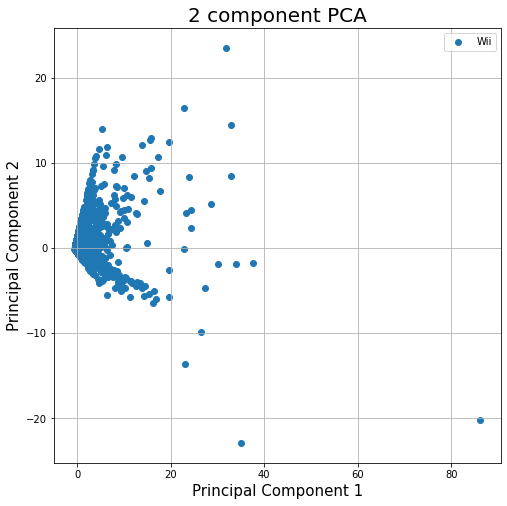

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot() 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Wii', 'NES' ]
colors = ['b', 'o']
#for target, color in zip(targets,colors):
   # indicesToKeep = finalDf['Global_Sales'] == target
    #ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'])
ax.scatter(finalDf[ 'principal component 1'] , finalDf[ 'principal component 2'])
ax.legend(targets)
ax.grid(True)